### 1. 데이터 불러오기

In [1]:
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [16]:
padua_data = pd.read_csv('../data/kideny_PADUA_upload.csv')
renal_data = pd.read_csv('../data/kideny_RENAL_upload.csv')
treat_data = pd.read_csv('../data/kidney_treat_upload.csv')

## PADUA

### 'Tumor_PADUA' : 종양의 크기<br>
### 'Exophytic_PADUA' : 종양의 표면 위치<br>
### 'Rim_PADUA' : 종양의 신동과의 거리<br>
### 'Sinus_PADUA' : <br>
### 'Polarlocation_PADUA' : 종양의 세로 기준 위치<br>
### 'Collectingsystem_PADUA' :<br>
### 'PADUA_total' : 총 PADUA 점수<br>

## RENAL

### 'Radius_RENAL' : 종양의 최장 반지름 길이
### 'Exophytic_RENAL' : 종양의 외성장 정도
### 'Nearness_RENAL' : 종양의 집배뇨관의 근접 정도
### 'APX_RENAL' : 종양의 위치 - 전/후방(숫자)
### 'Location_RENAL' : 종양의 집배뇨관 기준 상대 위치
### 'RENAL_total' : 최종 RENAL 점수

In [17]:
padua_data.head()

,serial,Tumor_PADUA,Exophytic_PADUA,Rim_PADUA,Sinus_PADUA,Polarlocation_PADUA,Collectingsystem_PADUA,PADUA_total
0,1,2.0,1.0,2.0,1.0,1.0,1.0,8
1,2,1.0,2.0,1.0,1.0,2.0,1.0,8
2,3,1.0,1.0,1.0,1.0,2.0,1.0,7
3,4,1.0,1.0,1.0,1.0,2.0,2.0,8
4,5,1.0,2.0,1.0,1.0,2.0,1.0,8


In [18]:
renal_data.head()

,serial,Radius_RENAL,Exophytic_RENAL,Nearness_RENAL,APX_RENAL,Location_RENAL,RENAL_total
0,1,2.0,1.0,1.0,2.0,1.0,4
1,2,1.0,2.0,2.0,2.0,2.0,5
2,3,1.0,1.0,1.0,1.0,1.0,3
3,4,1.0,1.0,3.0,2.0,3.0,5
4,5,1.0,2.0,1.0,1.0,3.0,4


In [19]:
treat_data.head()

,serial,RAIV_1
0,1,51.1
1,2,46.1
2,3,14.8
3,4,19.7
4,5,14.8


### 2. 간단한 데이터 정리 

* treat_data 에 변수가 <serial\tRAIV_1> 이라는 하나로 잡혀서 2개의 컬럼으로 만들어준 후, <br>
\t 을 ''으로 변경 후, 결측치를 (3개) 평균값으로 채워넣어줌

In [20]:
mean_value = treat_data['RAIV_1'].mean()
treat_data['RAIV_1'].fillna(mean_value, inplace=True)

In [21]:
treat_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   serial  400 non-null    int64  
 1   RAIV_1  400 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 6.4 KB


### 3. padua 데이터와 renal 데이터를 serial 번호 기준으로 join
하나의 데이터로 합쳐줌

In [22]:
merged_data = pd.merge(padua_data, renal_data, on='serial')
merged_data

,serial,Tumor_PADUA,Exophytic_PADUA,Rim_PADUA,Sinus_PADUA,Polarlocation_PADUA,Collectingsystem_PADUA,PADUA_total,Radius_RENAL,Exophytic_RENAL,Nearness_RENAL,APX_RENAL,Location_RENAL,RENAL_total
0,1,2.0,1.0,2.0,1.0,1.0,1.0,8,2.0,1.0,1.0,2.0,1.0,4
1,2,1.0,2.0,1.0,1.0,2.0,1.0,8,1.0,2.0,2.0,2.0,2.0,5
2,3,1.0,1.0,1.0,1.0,2.0,1.0,7,1.0,1.0,1.0,1.0,1.0,3
3,4,1.0,1.0,1.0,1.0,2.0,2.0,8,1.0,1.0,3.0,2.0,3.0,5
4,5,1.0,2.0,1.0,1.0,2.0,1.0,8,1.0,2.0,1.0,1.0,3.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,408,1.0,2.0,1.0,1.0,2.0,1.0,8,1.0,2.0,1.0,1.0,3.0,4
396,409,1.0,2.0,1.0,1.0,2.0,1.0,8,1.0,2.0,1.0,1.0,3.0,4
397,410,1.0,2.0,1.0,1.0,1.0,1.0,7,1.0,2.0,1.0,1.0,1.0,4
398,411,1.0,2.0,2.0,2.0,1.0,2.0,10,1.0,2.0,2.0,2.0,1.0,5


#### 4. 중복데이터 삭제 - Tumor_PADUA , Exophytic_PADUA
#### 컬럼명 변경
        Radus_RENAL -> Radius_RENAL_PADUA
        Exophytic_RENAL -> Exophytic_RENAL_PADUA

In [23]:
merged_data.drop(['Tumor_PADUA', 'Exophytic_PADUA'], axis=1, inplace=True)

In [24]:
merged_data.rename(columns={'Radius_RENAL': 'Radius_RENAL_PADUA'}, inplace=True)
merged_data.rename(columns={'Exophytic_RENAL': 'Exophytic_RENAL_PADUA'}, inplace=True)

In [25]:
merged_data

,serial,Rim_PADUA,Sinus_PADUA,Polarlocation_PADUA,Collectingsystem_PADUA,PADUA_total,Radius_RENAL_PADUA,Exophytic_RENAL_PADUA,Nearness_RENAL,APX_RENAL,Location_RENAL,RENAL_total
0,1,2.0,1.0,1.0,1.0,8,2.0,1.0,1.0,2.0,1.0,4
1,2,1.0,1.0,2.0,1.0,8,1.0,2.0,2.0,2.0,2.0,5
2,3,1.0,1.0,2.0,1.0,7,1.0,1.0,1.0,1.0,1.0,3
3,4,1.0,1.0,2.0,2.0,8,1.0,1.0,3.0,2.0,3.0,5
4,5,1.0,1.0,2.0,1.0,8,1.0,2.0,1.0,1.0,3.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...
395,408,1.0,1.0,2.0,1.0,8,1.0,2.0,1.0,1.0,3.0,4
396,409,1.0,1.0,2.0,1.0,8,1.0,2.0,1.0,1.0,3.0,4
397,410,1.0,1.0,1.0,1.0,7,1.0,2.0,1.0,1.0,1.0,4
398,411,2.0,2.0,1.0,2.0,10,1.0,2.0,2.0,2.0,1.0,5


In [26]:
merged_data['PADUA_total'].value_counts().sort_index()

PADUA_total
0      6
6     36
7     98
8     93
9     68
10    42
11    31
12    23
13     3
Name: count, dtype: int64

In [27]:
merged_data['RENAL_total'].value_counts().sort_index()

RENAL_total
0     6
3    71
4    96
5    83
6    68
7    66
8    10
Name: count, dtype: int64

In [28]:
# 결측치를 0으로 채움
merged_data.fillna(0, inplace=True)


In [29]:
# 결측치 확인
merged_data.isnull().sum()


serial                    0
Rim_PADUA                 0
Sinus_PADUA               0
Polarlocation_PADUA       0
Collectingsystem_PADUA    0
PADUA_total               0
Radius_RENAL_PADUA        0
Exophytic_RENAL_PADUA     0
Nearness_RENAL            0
APX_RENAL                 0
Location_RENAL            0
RENAL_total               0
dtype: int64

In [30]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   serial                  400 non-null    int64  
 1   Rim_PADUA               400 non-null    float64
 2   Sinus_PADUA             400 non-null    float64
 3   Polarlocation_PADUA     400 non-null    float64
 4   Collectingsystem_PADUA  400 non-null    float64
 5   PADUA_total             400 non-null    int64  
 6   Radius_RENAL_PADUA      400 non-null    float64
 7   Exophytic_RENAL_PADUA   400 non-null    float64
 8   Nearness_RENAL          400 non-null    float64
 9   APX_RENAL               400 non-null    float64
 10  Location_RENAL          400 non-null    float64
 11  RENAL_total             400 non-null    int64  
dtypes: float64(9), int64(3)
memory usage: 37.6 KB


In [31]:
merged_data_result = pd.merge(merged_data, treat_data, on='serial')


In [32]:
merged_data_result

,serial,Rim_PADUA,Sinus_PADUA,Polarlocation_PADUA,Collectingsystem_PADUA,PADUA_total,Radius_RENAL_PADUA,Exophytic_RENAL_PADUA,Nearness_RENAL,APX_RENAL,Location_RENAL,RENAL_total,RAIV_1
0,1,2.0,1.0,1.0,1.0,8,2.0,1.0,1.0,2.0,1.0,4,51.1
1,2,1.0,1.0,2.0,1.0,8,1.0,2.0,2.0,2.0,2.0,5,46.1
2,3,1.0,1.0,2.0,1.0,7,1.0,1.0,1.0,1.0,1.0,3,14.8
3,4,1.0,1.0,2.0,2.0,8,1.0,1.0,3.0,2.0,3.0,5,19.7
4,5,1.0,1.0,2.0,1.0,8,1.0,2.0,1.0,1.0,3.0,4,14.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,408,1.0,1.0,2.0,1.0,8,1.0,2.0,1.0,1.0,3.0,4,21.3
396,409,1.0,1.0,2.0,1.0,8,1.0,2.0,1.0,1.0,3.0,4,30.5
397,410,1.0,1.0,1.0,1.0,7,1.0,2.0,1.0,1.0,1.0,4,70.7
398,411,2.0,2.0,1.0,2.0,10,1.0,2.0,2.0,2.0,1.0,5,12.6


### 5. 데이터 나누기 train_test_split

In [33]:
from sklearn.model_selection import train_test_split

X = merged_data_result.drop('RAIV_1', axis=1)  # 'RAIV_1' 열을 제외한 모든 열 선택
y = merged_data_result['RAIV_1']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### 5.  최적의 군집 수 찾기

In [34]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

cluster_range = range(2, 11)

optimal_clusters = 0
max_silhouette_score = -1

for n_clusters in cluster_range:
    
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    
    kmeans.fit(X_train)
    
    clusters = kmeans.predict(X_train)
    
    silhouette_avg = silhouette_score(X_train, clusters)
    
    if silhouette_avg > max_silhouette_score:
        max_silhouette_score = silhouette_avg
        optimal_clusters = n_clusters

# Print the optimal number of clusters
print("Optimal number of clusters:", optimal_clusters)


c:\Users\kimsh-dt01\miniconda3\envs\ds_study\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\kimsh-dt01\miniconda3\envs\ds_study\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\kimsh-dt01\miniconda3\envs\ds_study\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\kimsh-dt01\miniconda3\envs\ds_study\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWa

Optimal number of clusters: 2


In [35]:
from sklearn.cluster import KMeans


kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X_train)

# 학습된 모델을 이용하여 train 데이터에 대한 군집 레이블 예측
train_cluster_labels = kmeans.predict(X_train)

# 학습된 모델을 이용하여 test 데이터에 대한 군집 레이블 예측
test_cluster_labels = kmeans.predict(X_test)

print('train_cluster_labels :', train_cluster_labels)
print('test_cluster_labels : ', test_cluster_labels)



c:\Users\kimsh-dt01\miniconda3\envs\ds_study\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\kimsh-dt01\miniconda3\envs\ds_study\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


train_cluster_labels : [1 1 1 0 0 1 0 0 1 1 0 0 1 0 1 0 0 0 0 1 0 1 1 1 1 1 1 1 0 0 1 0 0 0 0 1 1
 0 0 0 1 1 1 0 1 1 0 0 1 0 0 1 0 1 1 1 0 0 0 0 1 1 0 1 1 0 1 1 1 0 1 0 0 1
 1 1 1 1 0 0 0 0 0 1 0 1 0 1 1 0 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 0 1 1
 1 0 1 0 0 0 0 0 0 1 1 0 0 0 1 1 1 0 1 0 1 1 0 0 1 0 0 0 0 0 1 0 1 1 1 1 0
 1 0 1 0 0 1 1 0 0 0 0 0 0 1 1 0 1 1 0 1 0 0 1 0 1 0 1 0 1 1 0 1 1 1 1 1 1
 1 0 0 0 1 1 0 0 0 1 1 0 0 0 0 1 0 0 1 0 0 0 1 1 0 1 1 1 0 1 0 1 0 0 0 0 1
 0 1 1 1 1 1 1 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 1 0 0 1 1 1 1
 1 0 1 0 1 0 1 0 0 0 1 0 1 0 1 0 0 1 0 0 0 0 1 1 1 1 0 1 1 1 1 0 0 0 1 0 1
 0 1 0 0 0 0 1 1 1 0 1 0 1 0 0 1 0 1 1 1 1 0 0 1]
test_cluster_labels :  [0 0 1 0 1 1 0 1 0 1 1 0 1 1 1 1 0 0 0 0 1 1 0 0 1 0 1 0 0 1 0 1 0 1 0 1 1
 0 1 1 0 1 1 1 1 0 1 1 1 1 1 0 0 1 0 1 0 1 1 1 1 0 0 1 1 1 0 0 0 1 0 1 1 1
 0 0 0 0 1 0]


### 군집 집단 나누기

In [37]:
tr_cluster_1_data = X_train[train_cluster_labels == 1]
tr_cluster_0_data = X_train[train_cluster_labels == 0]

test_cluster_1_data = X_test[test_cluster_labels == 1]
test_cluster_0_data = X_test[test_cluster_labels == 0]

### 군집 집단 시각화

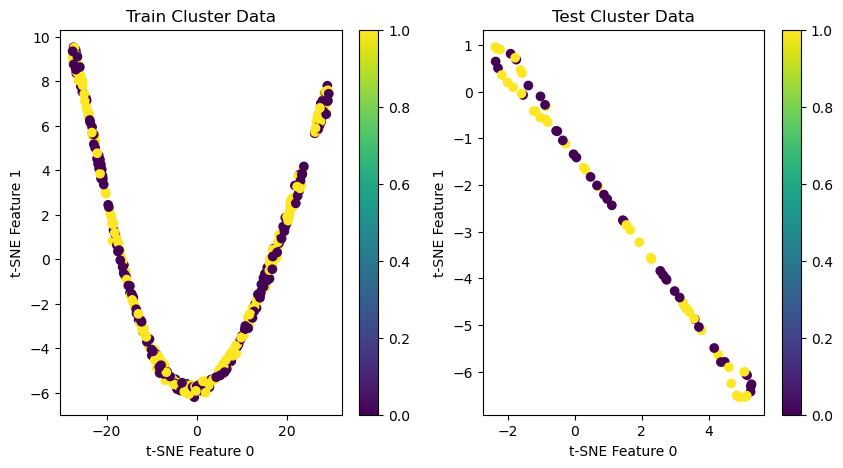

In [44]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import pandas as pd

# train 데이터와 test 데이터를 하나의 데이터프레임으로 합칩니다.
tr_cluster_data = pd.concat([tr_cluster_1_data, tr_cluster_0_data], ignore_index=True)
test_cluster_data = pd.concat([test_cluster_1_data, test_cluster_0_data], ignore_index=True)

# t-SNE를 사용하여 데이터를 2차원으로 축소합니다.
tsne = TSNE(n_components=2, random_state=42)
tr_cluster_tsne = tsne.fit_transform(tr_cluster_data)
test_cluster_tsne = tsne.fit_transform(test_cluster_data)

# 군집 내 데이터 시각화
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.scatter(tr_cluster_tsne[:, 0], tr_cluster_tsne[:, 1], c=train_cluster_labels, cmap='viridis')
plt.title('Train Cluster Data')
plt.xlabel('t-SNE Feature 0')
plt.ylabel('t-SNE Feature 1')
plt.colorbar()

plt.subplot(1, 2, 2)
plt.scatter(test_cluster_tsne[:, 0], test_cluster_tsne[:, 1], c=test_cluster_labels, cmap='viridis')
plt.xlabel('t-SNE Feature 0')
plt.ylabel('t-SNE Feature 1')
plt.title('Test Cluster Data')
plt.colorbar()

plt.show()


# RandomForestRegressor

In [74]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# RandomForestRegressor 모델 초기화
rf_model = RandomForestRegressor(random_state=42)

# 군집에 속한 데이터로 모델 학습
rf_model.fit(tr_cluster_0_data, y_train[train_cluster_labels == 0])

# 테스트 데이터에 대한 예측
predictions = rf_model.predict(test_cluster_0_data)

# 회귀 모델의 성능 평가
mse = mean_squared_error(y_test[test_cluster_labels == 0], predictions)
r2 = r2_score(y_test[test_cluster_labels == 0], predictions)

print('Mean Squared Error for cluster 0:', mse)
print('R^2 Score for cluster 0:', r2)


Mean Squared Error for cluster 0: 449.2750173055553
R^2 Score for cluster 0: 0.27870638968975847


In [75]:
# RandomForestRegressor 모델 초기화
rf_model_cluster_1 = RandomForestRegressor(random_state=42)

# 군집에 속한 데이터로 모델 학습
rf_model_cluster_1.fit(tr_cluster_1_data, y_train[train_cluster_labels == 1])

# 테스트 데이터에 대한 예측
predictions_cluster_1 = rf_model_cluster_1.predict(test_cluster_1_data)

# 회귀 모델의 성능 평가
mse_cluster_1 = mean_squared_error(y_test[test_cluster_labels == 1], predictions_cluster_1)
r2_cluster_1 = r2_score(y_test[test_cluster_labels == 1], predictions_cluster_1)

print('Mean Squared Error for cluster 1:', mse_cluster_1)
print('R^2 Score for cluster 1:', r2_cluster_1)


Mean Squared Error for cluster 1: 603.4771822786553
R^2 Score for cluster 1: 0.07062436035256414


### 결과: 1보다 0이 좀 더 좋은 성능을 나타냄

# Decision_tree

In [76]:
from sklearn.tree import DecisionTreeRegressor

# DecisionTreeRegressor 모델 초기화
dt_model_cluster_0 = DecisionTreeRegressor(random_state=42)

# 군집에 속한 데이터로 모델 학습
dt_model_cluster_0.fit(tr_cluster_0_data, y_train[train_cluster_labels == 0])

# 테스트 데이터에 대한 예측
predictions_cluster_0 = dt_model_cluster_0.predict(test_cluster_0_data)

# 회귀 모델의 성능 평가
mse_cluster_0 = mean_squared_error(y_test[test_cluster_labels == 0], predictions_cluster_0)
r2_cluster_0 = r2_score(y_test[test_cluster_labels == 0], predictions_cluster_0)

print('Mean Squared Error for cluster 0:', mse_cluster_0)
print('R^2 Score for cluster 0:', r2_cluster_0)


Mean Squared Error for cluster 0: 601.5791666666668
R^2 Score for cluster 0: 0.034187986648459456


In [77]:
from sklearn.tree import DecisionTreeRegressor

# DecisionTreeRegressor 모델 초기화
dt_model_cluster_1 = DecisionTreeRegressor(random_state=42)

# 군집에 속한 데이터로 모델 학습
dt_model_cluster_1.fit(tr_cluster_1_data, y_train[train_cluster_labels == 1])

# 테스트 데이터에 대한 예측
predictions_cluster_1 = dt_model_cluster_1.predict(test_cluster_1_data)

# 회귀 모델의 성능 평가
mse_cluster_1 = mean_squared_error(y_test[test_cluster_labels == 1], predictions_cluster_1)
r2_cluster_1 = r2_score(y_test[test_cluster_labels == 1], predictions_cluster_1)

print('Mean Squared Error for cluster 1:', mse_cluster_1)
print('R^2 Score for cluster 1:', r2_cluster_1)


Mean Squared Error for cluster 1: 750.1281818181815
R^2 Score for cluster 1: -0.1552232284284305
